In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
age_csv = "Resources/Texas_Counties_by_Age.csv"
race_csv = "Resources/Texas_Counties_by_Race.csv"
sex_csv = "Resources/Texas_Counties_by_Sex.csv"
income_csv = "Resources/Texas_Counties_by_Income.csv"
states_csv = "Resources/US_Hispanic_Population.csv"

In [4]:
# Read csv files

age_df = pd.read_csv(age_csv)
race_df = pd.read_csv(race_csv)
sex_df = pd.read_csv(sex_csv)
income_df = pd.read_csv(income_csv)
states_df = pd.read_csv(states_csv)

In [5]:
# Rename columns for states_df



states_df = states_df.rename(columns={"Estimate; HISPANIC OR LATINO AND RACE - Total population - Hispanic or Latino (of any race)": "Total Hispanic Population",
                                        "Estimate; HISPANIC OR LATINO AND RACE - Total population - Not Hispanic or Latino": "Total Non Hispanic Population"})

states_df.head()

,GEO.id,GEO.id2,Geography,Total population,Total Hispanic Population,Total Non Hispanic Population
0,0400000US01,1,Alabama,4841164,193503,4647661
1,0400000US02,2,Alaska,736855,49031,687824
2,0400000US04,4,Arizona,6728577,2054849,4673728
3,0400000US05,5,Arkansas,2968472,207049,2761423
4,0400000US06,6,California,38654206,14903982,23750224


In [6]:
# Return top 5 states with largest Hispanic Population
top5_states_df = states_df.nlargest(5, columns=['Total Hispanic Population'])

# Format columns of data
#top5_states_df['Total Hispanic Population'] = top5_states_df['Total Hispanic Population'].astype(int).apply(lambda x: "{:,}".format(x))
#top5_states_df['Total population'] = top5_states_df['Total population'].astype(int).apply(lambda x: "{:,}".format(x))
#top5_states_df['Total Non Hispanic Population'] = top5_states_df['Total Non Hispanic Population'].astype(int).apply(lambda x: "{:,}".format(x))

top5_states_df["Total Hispanic Population (M)"] = top5_states_df["Total Hispanic Population"] /1000000

# Display the top 5 states 
top5_states_df


,GEO.id,GEO.id2,Geography,Total population,Total Hispanic Population,Total Non Hispanic Population,Total Hispanic Population (M)
4,0400000US06,6,California,38654206,14903982,23750224,14.903982
43,0400000US48,48,Texas,26956435,10413150,16543285,10.413150
9,0400000US12,12,Florida,19934451,4806854,15127597,4.806854
32,0400000US36,36,New York,19697457,3661929,16035528,3.661929
51,0400000US72,72,Puerto Rico,3529385,3492166,37219,3.492166


<IPython.core.display.Javascript object>


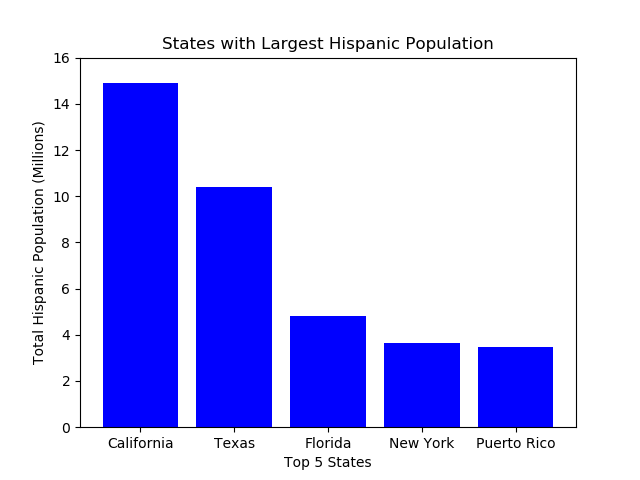

<function matplotlib.pyplot.show(*args, **kw)>

In [7]:
# Plot graph for states with top 5 
plt.bar(top5_states_df["Geography"], top5_states_df["Total Hispanic Population (M)"], color="b", align="center")


plt.title("States with Largest Hispanic Population")
plt.xlabel("Top 5 States")
plt.ylabel("Total Hispanic Population (Millions)")
plt.ylim(0,16)

plt.savefig("../Craft Beer/Hispanic Population.png")
plt.show

In [8]:
# Display Data Frame for Age
#age_df.head()

In [9]:
# Display Data Frame for Race
#race_df.head()

In [10]:
# Display Data Frame for Sex
#sex_df.head()

In [11]:
# Display Data Frame for Income 

#income_df.head()

In [12]:
# Merge the four DataFrames together based on the unique identifiers
texas_merge1 = pd.merge(age_df, race_df, on=["GEO.id", "GEO.id2","Geography"])
texas_merge2 = pd.merge(texas_merge1, sex_df, on=["GEO.id", "GEO.id2","Geography"])
texas_merge3 = pd.merge(texas_merge2, income_df, on=["GEO.id", "GEO.id2","Geography"])
texas_merge3.head()

,GEO.id,GEO.id2,Geography,Estimate; SEX AND AGE - 20 to 24 years,Estimate; SEX AND AGE - 25 to 34 years,Estimate; SEX AND AGE - 35 to 44 years,Estimate; SEX AND AGE - 45 to 54 years,Estimate; SEX AND AGE - 55 to 59 years,Estimate; SEX AND AGE - 60 to 64 years,Estimate; SEX AND AGE - 65 to 74 years,...,Total population,Total population - Hispanic or Latino (of any race),Total population - Not Hispanic or Latino,Total population - Not Hispanic or Latino - White alone,Total population - Not Hispanic or Latino - Black or African American alone,Total population - Not Hispanic or Latino - Asian alone,SEX AND AGE - Total population,SEX AND AGE - Total population - Male,SEX AND AGE - Total population - Female,Estimate; INCOME AND BENEFITS - Total households - Mean household income (dollars)
0,0500000US48001,48001,"Anderson County, Texas",3587,9024,9717,8273,3488,3420,4681,...,57772,9799,47973,34680,12246,336,57772,35381,22391,57638
1,0500000US48003,48003,"Andrews County, Texas",1169,2427,2167,2170,890,795,893,...,17215,9360,7855,7250,256,36,17215,8734,8481,87591
2,0500000US48005,48005,"Angelina County, Texas",5843,10973,10816,11329,5363,5061,7375,...,87657,18505,69152,54060,12783,885,87657,42765,44892,58796
3,0500000US48007,48007,"Aransas County, Texas",1195,2215,2354,3285,1901,1888,3922,...,24729,6496,18233,16836,400,249,24729,12246,12483,72808
4,0500000US48009,48009,"Archer County, Texas",448,841,1007,1351,731,603,865,...,8750,722,8028,7751,60,43,8750,4344,4406,74568


In [13]:
# Rename headers of data

texas_df = texas_merge3.rename(columns={"Estimate; SEX AND AGE - 20 to 24 years": "20-24 years old",
                                        "Estimate; SEX AND AGE - 25 to 34 years": "25-34 years old",
                                        "Estimate; SEX AND AGE - 35 to 44 years": "35-44 years old",
                                        "Estimate; SEX AND AGE - 45 to 54 years": "45-54 years old",
                                        "Estimate; SEX AND AGE - 55 to 59 years": "55-59 years old",
                                        "Estimate; SEX AND AGE - 60 to 64 years": "60-64 years old",
                                        "Estimate; SEX AND AGE - 65 to 74 years": "65-74 years old",
                                        "Total population - Hispanic or Latino (of any race)": "Hispanic Population Total",
                                        "Total population - Not Hispanic or Latino": "Non-Hispanic Population Total",
                                        "Total population - Not Hispanic or Latino - White alone": "White Population Total",
                                        "Total population - Not Hispanic or Latino - Black or African American alone": "African American Population Total",
                                        "Total population - Not Hispanic or Latino - Asian alone": "Asian Population Total",
                                        "EX AND AGE - Total population": "Total Population -Sex",
                                        "SEX AND AGE - Total population - Male": "Male Population Total",
                                        "SEX AND AGE - Total population - Female": "Female Population Total",
                                        "Estimate; INCOME AND BENEFITS - Total households - Mean household income (dollars)": "Mean Household Income"                                       
                                       })
texas_df.head()

,GEO.id,GEO.id2,Geography,20-24 years old,25-34 years old,35-44 years old,45-54 years old,55-59 years old,60-64 years old,65-74 years old,...,Total population,Hispanic Population Total,Non-Hispanic Population Total,White Population Total,African American Population Total,Asian Population Total,SEX AND AGE - Total population,Male Population Total,Female Population Total,Mean Household Income
0,0500000US48001,48001,"Anderson County, Texas",3587,9024,9717,8273,3488,3420,4681,...,57772,9799,47973,34680,12246,336,57772,35381,22391,57638
1,0500000US48003,48003,"Andrews County, Texas",1169,2427,2167,2170,890,795,893,...,17215,9360,7855,7250,256,36,17215,8734,8481,87591
2,0500000US48005,48005,"Angelina County, Texas",5843,10973,10816,11329,5363,5061,7375,...,87657,18505,69152,54060,12783,885,87657,42765,44892,58796
3,0500000US48007,48007,"Aransas County, Texas",1195,2215,2354,3285,1901,1888,3922,...,24729,6496,18233,16836,400,249,24729,12246,12483,72808
4,0500000US48009,48009,"Archer County, Texas",448,841,1007,1351,731,603,865,...,8750,722,8028,7751,60,43,8750,4344,4406,74568


In [14]:
# Index data frame for Geography header
texas_df.set_index("Geography", inplace=True)
texas_df.head()

,GEO.id,GEO.id2,20-24 years old,25-34 years old,35-44 years old,45-54 years old,55-59 years old,60-64 years old,65-74 years old,Estimate; SEX AND AGE - 75 to 84 years,...,Total population,Hispanic Population Total,Non-Hispanic Population Total,White Population Total,African American Population Total,Asian Population Total,SEX AND AGE - Total population,Male Population Total,Female Population Total,Mean Household Income
Geography,,,,,,,,,,,,,,,,,,,,,
"Anderson County, Texas",0500000US48001,48001,3587,9024,9717,8273,3488,3420,4681,2417,...,57772,9799,47973,34680,12246,336,57772,35381,22391,57638
"Andrews County, Texas",0500000US48003,48003,1169,2427,2167,2170,890,795,893,647,...,17215,9360,7855,7250,256,36,17215,8734,8481,87591
"Angelina County, Texas",0500000US48005,48005,5843,10973,10816,11329,5363,5061,7375,3894,...,87657,18505,69152,54060,12783,885,87657,42765,44892,58796
"Aransas County, Texas",0500000US48007,48007,1195,2215,2354,3285,1901,1888,3922,2125,...,24729,6496,18233,16836,400,249,24729,12246,12483,72808
"Archer County, Texas",0500000US48009,48009,448,841,1007,1351,731,603,865,432,...,8750,722,8028,7751,60,43,8750,4344,4406,74568


In [15]:
# Search for Houston counties on Georgraphy (Counties making up Houston area)

houston_df = texas_df.loc[["Harris County, Texas", "Fort Bend County, Texas", "Montgomery County, Texas",
                          "Brazoria County, Texas", "Galveston County, Texas", "Liberty County, Texas",
                          "Waller County, Texas", "Chambers County, Texas", "Austin County, Texas"]]

houston_df.head()

,GEO.id,GEO.id2,20-24 years old,25-34 years old,35-44 years old,45-54 years old,55-59 years old,60-64 years old,65-74 years old,Estimate; SEX AND AGE - 75 to 84 years,...,Total population,Hispanic Population Total,Non-Hispanic Population Total,White Population Total,African American Population Total,Asian Population Total,SEX AND AGE - Total population,Male Population Total,Female Population Total,Mean Household Income
Geography,,,,,,,,,,,,,,,,,,,,,
"Harris County, Texas",0500000US48201,48201,320151,718046,633095,565231,256063,211337,251531,113737,...,4434257,1855604,2578653,1382851,821066,293797,4434257,2205342,2228915,83156
"Fort Bend County, Texas",0500000US48157,48157,39935,85049,104477,98512,46350,35135,42339,17012,...,683756,164065,519691,238565,138876,127669,683756,335925,347831,115875
"Montgomery County, Texas",0500000US48339,48339,30868,65426,71498,73404,34067,29477,39460,16920,...,518849,116429,402420,356462,22110,13244,518849,256808,262041,100283
"Brazoria County, Texas",0500000US48039,48039,20490,46983,49535,46811,20616,17982,22754,10463,...,338419,98927,239492,169092,43217,20699,338419,171456,166963,89752
"Galveston County, Texas",0500000US48167,48167,19822,41608,40880,44871,21861,19616,24319,11552,...,314485,74081,240404,183283,40140,10145,314485,155271,159214,87270


In [16]:
# Search for San Antonio counties on Georgraphy (Counties making up Houston area)

san_antonio_df = texas_df.loc[["Atascosa County, Texas", "Bandera County, Texas", "Bexar County, Texas",
                          "Comal County, Texas", "Guadalupe County, Texas", "Kendall County, Texas",
                          "Medina County, Texas", "Wilson County, Texas"]]

#san_antonio_df.head()

In [17]:
# Combine San Antonio and Houston County GEO IDs

combined_cities_df = texas_df.loc[["Harris County, Texas", "Fort Bend County, Texas", "Montgomery County, Texas",
                          "Brazoria County, Texas", "Galveston County, Texas", "Liberty County, Texas",
                          "Waller County, Texas", "Chambers County, Texas", "Austin County, Texas", "Atascosa County, Texas",
                          "Bandera County, Texas", "Bexar County, Texas",
                          "Comal County, Texas", "Guadalupe County, Texas", "Kendall County, Texas",
                          "Medina County, Texas", "Wilson County, Texas"]]

#combined_cities_df.head()

In [18]:
# Give me list of column names
#list(combined_cities_df)

In [19]:
# Calculations on raw data 

# Calculate number of millennials in Houston (20-24 Year Olds + 25-34 Year Olds)
combined_cities_df["Millennial Population"] = combined_cities_df["20-24 years old"] + combined_cities_df["25-34 years old"]
combined_cities_df["% Hispanic Population"] = combined_cities_df["Hispanic Population Total"] / combined_cities_df["Total population"]
combined_cities_df["% Male Population"] = combined_cities_df["Male Population Total"] / combined_cities_df["Total population"]
combined_cities_df["Target Population Quantity"] = combined_cities_df["Millennial Population"] * combined_cities_df["% Hispanic Population"] * combined_cities_df["% Male Population"] 

#Display dataframe with new calcualted columns and formatted data
combined_cities_df.head()

,GEO.id,GEO.id2,20-24 years old,25-34 years old,35-44 years old,45-54 years old,55-59 years old,60-64 years old,65-74 years old,Estimate; SEX AND AGE - 75 to 84 years,...,African American Population Total,Asian Population Total,SEX AND AGE - Total population,Male Population Total,Female Population Total,Mean Household Income,Millennial Population,% Hispanic Population,% Male Population,Target Population Quantity
Geography,,,,,,,,,,,,,,,,,,,,,
"Harris County, Texas",0500000US48201,48201,320151,718046,633095,565231,256063,211337,251531,113737,...,821066,293797,4434257,2205342,2228915,83156,1038197,0.418470,0.497342,216072.400877
"Fort Bend County, Texas",0500000US48157,48157,39935,85049,104477,98512,46350,35135,42339,17012,...,138876,127669,683756,335925,347831,115875,124984,0.239947,0.491294,14733.651320
"Montgomery County, Texas",0500000US48339,48339,30868,65426,71498,73404,34067,29477,39460,16920,...,22110,13244,518849,256808,262041,100283,96294,0.224399,0.494957,10695.152349
"Brazoria County, Texas",0500000US48039,48039,20490,46983,49535,46811,20616,17982,22754,10463,...,43217,20699,338419,171456,166963,89752,67473,0.292321,0.506638,9992.820156
"Galveston County, Texas",0500000US48167,48167,19822,41608,40880,44871,21861,19616,24319,11552,...,40140,10145,314485,155271,159214,87270,61430,0.235563,0.493731,7144.598533


In [20]:
# Data Format on calculated columns and round cols

combined_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Harris County, Texas to Wilson County, Texas
Data columns (total 25 columns):
GEO.id                                       17 non-null object
GEO.id2                                      17 non-null int64
20-24 years old                              17 non-null int64
25-34 years old                              17 non-null int64
35-44 years old                              17 non-null int64
45-54 years old                              17 non-null int64
55-59 years old                              17 non-null int64
60-64 years old                              17 non-null int64
65-74 years old                              17 non-null int64
Estimate; SEX AND AGE - 75 to 84 years       17 non-null int64
Estimate; SEX AND AGE - 85 years and over    17 non-null int64
Total population                             17 non-null int64
Hispanic Population Total                    17 non-null int64
Non-Hispanic Population Total                

In [21]:
# Round Total Population Quantity

combined_cities_df["Target Population Quantity"] = combined_cities_df['Target Population Quantity'].apply(lambda x: int(round(x, 0)))

#combined_cities_df["Target Population Quantity"] = combined_cities_df['Target Population Quantity'].apply(lambda x: int("{:,}".format(x)))
#combined_cities_df['Mean Household Income'] = combined_cities_df['Mean Household Income'].apply(lambda x: "{0:.2f}".format(x))
combined_cities_df.to_csv("Texas_Compare.csv", encoding='utf-8', index=False)
combined_cities_df.head()

,GEO.id,GEO.id2,20-24 years old,25-34 years old,35-44 years old,45-54 years old,55-59 years old,60-64 years old,65-74 years old,Estimate; SEX AND AGE - 75 to 84 years,...,African American Population Total,Asian Population Total,SEX AND AGE - Total population,Male Population Total,Female Population Total,Mean Household Income,Millennial Population,% Hispanic Population,% Male Population,Target Population Quantity
Geography,,,,,,,,,,,,,,,,,,,,,
"Harris County, Texas",0500000US48201,48201,320151,718046,633095,565231,256063,211337,251531,113737,...,821066,293797,4434257,2205342,2228915,83156,1038197,0.418470,0.497342,216072
"Fort Bend County, Texas",0500000US48157,48157,39935,85049,104477,98512,46350,35135,42339,17012,...,138876,127669,683756,335925,347831,115875,124984,0.239947,0.491294,14734
"Montgomery County, Texas",0500000US48339,48339,30868,65426,71498,73404,34067,29477,39460,16920,...,22110,13244,518849,256808,262041,100283,96294,0.224399,0.494957,10695
"Brazoria County, Texas",0500000US48039,48039,20490,46983,49535,46811,20616,17982,22754,10463,...,43217,20699,338419,171456,166963,89752,67473,0.292321,0.506638,9993
"Galveston County, Texas",0500000US48167,48167,19822,41608,40880,44871,21861,19616,24319,11552,...,40140,10145,314485,155271,159214,87270,61430,0.235563,0.493731,7145


In [22]:
#Create chart of Texas that shows Target Population
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
import plotly
from config_texas import api_key_tx

plotly.tools.set_credentials_file(username='wundy7', api_key=api_key_tx)


values = combined_cities_df['Target Population Quantity'].tolist()
fips = combined_cities_df['GEO.id2'].tolist()
scope = ["TX"]

colorscale = [
    'rgb(68.0, 1.0, 84.0)',
    'rgb(66.0, 64.0, 134.0)',
    'rgb(38.0, 130.0, 142.0)',
    'rgb(63.0, 188.0, 115.0)',
    'rgb(216.0, 226.0, 25.0)' ]
    
fig = ff.create_choropleth(
    fips=fips, values=values, scope=scope,
    #colorscale=colorscale, round_legend_values=True,
    round_legend_values=True,
    simplify_county=0, simplify_state=0,
    county_outline={'color': 'rgb(15, 15, 55)', 'width': 1},
    state_outline={'width': 1},
    legend_title='Target Population',
    title='San Antonio vs Houston (Target Population)'
)

py.image.save_as(fig, filename ="Texas Target Population.png")
py.iplot(fig, filename='choropleth of some texas counties - full usa scope')

C:\Users\Mike W\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~wundy7/0 or inside your plot.ly account where it is named 'choropleth of some texas counties - full usa scope'


In [23]:
#Create chart of Texas that shows Mean Household Income
values = combined_cities_df['Mean Household Income'].tolist()
fips = combined_cities_df['GEO.id2'].tolist()
scope = ["TX"]

colorscale = [
    'rgb(68.0, 1.0, 84.0)',
    'rgb(66.0, 64.0, 134.0)',
    'rgb(38.0, 130.0, 142.0)',
    'rgb(63.0, 188.0, 115.0)',
    'rgb(216.0, 226.0, 25.0)' ]
    
fig = ff.create_choropleth(
    fips=fips, values=values, scope=scope,
    #colorscale=colorscale, round_legend_values=True,
    round_legend_values=True,
    simplify_county=0, simplify_state=0,
    county_outline={'color': 'rgb(15, 15, 55)', 'width': 1},
    state_outline={'width': 1},
    legend_title='Income',
    title='San Antonio vs Houston (Mean Household Income)'
)

py.image.save_as(fig, filename ="Texas Income Average.png")
py.iplot(fig, filename='choropleth of some texas income counties - full usa scope')

C:\Users\Mike W\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




In [14]:
# Houston counties to focus on
    # Harris County = 48201 got
    # Fort Bend County = 48157 got
    # Montgomery County = 48339 got
    # Brazoria County = 48039 got
    # Galveston County = 48167 got
    # Liberty County = 48291 got
    # Waller County = 48473 got
    # Chambers County = 48071 got
    # Austin County = 48015 got

In [15]:
# San Antonio counties to focus on 
    # Atascosa = 48013 got
    # Bandera = 48019
    # Bexar = 48029
    # Comal = 48091
    # Guadalupe = 48187
    # Kendall = 48259 
    # Medina = 48325
    # Wilson = 48493